# Running WOT and moscot

This notebook collects and plots the results from the memory and time benchmark

In [1]:
import scanpy as sc
import anndata
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
Df=pd.read_pickle('benchmark_results.pkl')
Df['Cells']=Df['k']

# Memory

In [3]:
Dfm=Df[Df['Method'].isin(['WOT', 'moscot_CPU', 'moscot_LR_CPU'])].copy()

In [4]:
sizes=np.linspace(25,275,11, dtype=int)

In [5]:
Dfm['Memory']=Dfm['Max_memory']/1000
Dfm

,Method,k,Max_memory,Sinkhorn_time,Evaluation_time,Apoptosis_rate,Accuracy_Curated,Accuracy_Germ,Rank,Gamma,tau1,tau2,eps,Cells,Memory
0,WOT,75.0,284972.648438,1.112855,0.029144,0.032331,0.787614,0.972810,-1.0,NaN,0.90,0.9995,0.0050,75.0,284.972648
1,WOT,50.0,126906.652344,0.630063,0.014229,0.034164,0.789147,0.974684,-1.0,NaN,0.90,0.9995,0.0050,50.0,126.906652
2,WOT,25.0,32112.363281,0.148138,0.003101,0.038092,0.783135,0.972079,-1.0,NaN,0.90,0.9995,0.0050,25.0,32.112363
25,moscot_CPU,275.0,10462.312500,21.847500,14.218973,0.020890,0.800777,0.980411,-1.0,NaN,0.90,0.9995,0.0050,275.0,10.462312
26,moscot_CPU,225.0,8662.589844,15.928741,13.925924,0.020925,0.798381,0.978598,-1.0,NaN,0.90,0.9995,0.0050,225.0,8.662590
27,moscot_CPU,250.0,9556.058594,16.318409,13.091629,0.020891,0.800111,0.979474,-1.0,NaN,0.90,0.9995,0.0050,250.0,9.556059
28,moscot_CPU,200.0,7758.039062,10.650125,7.539227,0.021586,0.797163,0.977597,-1.0,NaN,0.90,0.9995,0.0050,200.0,7.758039
29,moscot_CPU,175.0,6855.507812,8.047184,5.769601,0.021790,0.795858,0.977212,-1.0,NaN,0.90,0.9995,0.0050,175.0,6.855508
30,moscot_CPU,150.0,5996.363281,5.764028,4.379550,0.022111,0.791851,0.974600,-1.0,NaN,0.90,0.9995,0.0050,150.0,5.996363
31,moscot_CPU,125.0,5061.675781,3.373021,2.142733,0.022468,0.789051,0.973114,-1.0,NaN,0.90,0.9995,0.0050,125.0,5.061676


# Time

In [6]:
Dft=Df[Df['Method'].isin(['WOT','moscot_GPU', 'moscot_LR_GPU'])].copy()
#Dft=Dft[(Dft['Hostname']=='supergpu08.scidom.de')|(Dft['Method']=='WOT')].copy()
Dft['Time_in_min']=Dft['Sinkhorn_time']*60
Dft

,Method,k,Max_memory,Sinkhorn_time,Evaluation_time,Apoptosis_rate,Accuracy_Curated,Accuracy_Germ,Rank,Gamma,tau1,tau2,eps,Cells,Time_in_min
0,WOT,75.0,284972.648438,1.112855,0.029144,0.032331,0.787614,0.972810,-1.0,NaN,0.90,0.9995,0.0050,75.0,66.771277
1,WOT,50.0,126906.652344,0.630063,0.014229,0.034164,0.789147,0.974684,-1.0,NaN,0.90,0.9995,0.0050,50.0,37.803752
2,WOT,25.0,32112.363281,0.148138,0.003101,0.038092,0.783135,0.972079,-1.0,NaN,0.90,0.9995,0.0050,25.0,8.888258
3,moscot_GPU,275.0,8300.589844,1.877392,0.764315,0.020906,0.800754,0.980412,-1.0,NaN,0.90,0.9995,0.0050,275.0,112.643505
4,moscot_LR_GPU,275.0,8299.363281,0.230973,0.002739,0.032314,0.676640,0.965566,2000.0,500.0,0.09,0.9995,0.0001,275.0,13.858370
5,moscot_GPU,250.0,7576.960938,1.462346,0.594465,0.020907,0.800086,0.979474,-1.0,NaN,0.90,0.9995,0.0050,250.0,87.740737
6,moscot_LR_GPU,250.0,7575.617188,0.193384,0.002518,0.023817,0.718446,0.967607,2000.0,500.0,0.09,0.9995,0.0001,250.0,11.603064
7,moscot_LR_GPU,225.0,6848.593750,0.165802,0.002404,0.026648,0.731070,0.969655,2000.0,500.0,0.09,0.9995,0.0001,225.0,9.948135
8,moscot_LR_GPU,200.0,6116.847656,0.139749,0.002368,0.031578,0.704513,0.969154,2000.0,500.0,0.09,0.9995,0.0001,200.0,8.384931
9,moscot_LR_GPU,175.0,5389.730469,0.116671,0.002055,0.025801,0.729938,0.970145,2000.0,500.0,0.09,0.9995,0.0001,175.0,7.000285


In [7]:
Dft['Sinkhorn_time_min']=Dft['Sinkhorn_time']*60

Dft[Dft['Method']=='moscot_LR_GPU'][['Method', 'k', 'Max_memory', 'Sinkhorn_time_min']].sort_values('k')

,Method,k,Max_memory,Sinkhorn_time_min
20,moscot_LR_GPU,25.0,2021.070312,0.794307
19,moscot_LR_GPU,50.0,2423.414062,1.459983
18,moscot_LR_GPU,75.0,2835.597656,2.347058
16,moscot_LR_GPU,100.0,3236.074219,3.293024
15,moscot_LR_GPU,125.0,3943.000000,4.351238
14,moscot_LR_GPU,150.0,4663.828125,5.445826
9,moscot_LR_GPU,175.0,5389.730469,7.000285
8,moscot_LR_GPU,200.0,6116.847656,8.384931
7,moscot_LR_GPU,225.0,6848.593750,9.948135
6,moscot_LR_GPU,250.0,7575.617188,11.603064


# Plots for the figure

### Plot only WOT, moscot-batch mode and LR_500

In [8]:
wot_color=np.array([126, 151, 186])/255
moscot_color=np.array([35,107,157])/255
rank2000=np.array([63,105,30])/255

palette=[wot_color, moscot_color, rank2000]

### Plot only WOT, moscot-batch mode and LR_500

In [9]:
import mplscience
mplscience.set_style(reset_current=True)

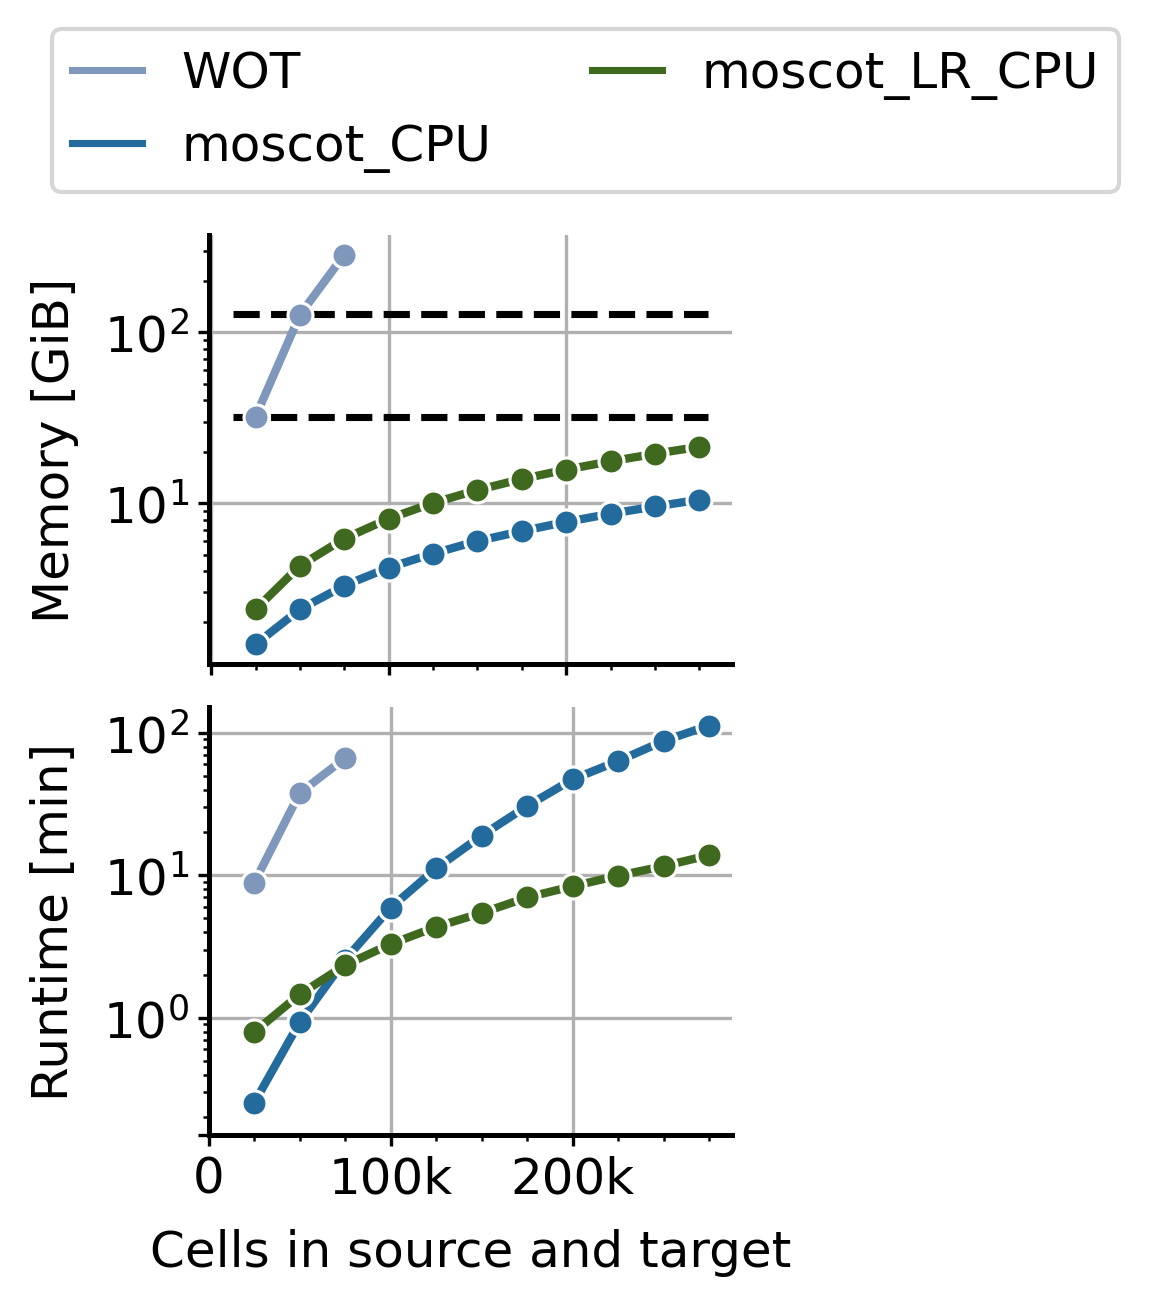

In [13]:
fontsize=12

r=0.75
y=3

fig, ax = plt.subplots(ncols=2, figsize=(y*r, y), dpi=300)
plt.clf()

plt.subplot(2, 1, 1) # 1 row, 2 cols, subplot 1

plt.subplots_adjust(bottom=0, top=1, hspace=0.1)

g2=sns.lineplot(data=Dfm, x='Cells', y='Memory', hue='Method', palette=palette, linewidth = 2, marker='o', 
                zorder=100)

g2.set_yscale('log')
g2.set_ylabel(ylabel='Memory [GiB]', fontsize=fontsize)
g2.set_yticks([10**0,10**1,10**2])
g2.set_yticklabels(['$10^0$','$10^1$','$10^2$'], fontsize=fontsize)



g2.tick_params(axis='x', which='major', labelsize=fontsize)
plt.plot([12,280], [32,32], 'k--')
plt.plot([12,280], [128,128], 'k--')
#plt.text(230,150,'Server', fontfamily=fontfamily, fontsize=fontsize)
#plt.text(230,40,'Laptop', fontfamily=fontfamily, fontsize=fontsize)


g2.set_xticks([0,100,200])
g2.set_xticklabels(labels=['','',''],fontsize=0)
g2.set_xticks([25, 50, 75, 125,150,175,225,250,275], minor=True)
g2.set(xlabel=None)
g2.set_xlabel(xlabel='', fontsize=fontsize)
g2.grid()
#g2.grid(b=True, which='minor', color='gray', linestyle='-', linewidth=0.3, axis='x')

plt.subplot(2, 1, 2) # 1 row, 2 cols, subplot 2

g1=sns.lineplot(data=Dft, x='Cells', y='Time_in_min', hue='Method', legend=False, palette=palette, linewidth = 2,
               marker='o', zorder=100)
g1.set_yscale('log')
g1.set_ylabel(ylabel='Runtime [min]', fontsize=fontsize)
g1.set_yticks([1.5*10**-1,10**-0,10**1,10**2])
g1.set_yticklabels(['','$10^0$','$10^1$','$10^2$'], fontsize=fontsize)
g1.tick_params(axis='x', which='major', labelsize=fontsize)

g1.set_xticks([0,100,200])
g1.set_xticklabels(['0','100k', '200k'], fontsize=fontsize)
g1.set_xticks([25, 50, 75, 125,150,175,225,250,275], minor=True)
#g1.set_xticks([], fontsize=0.001)
g1.set_xlabel(xlabel='Cells in source and target', fontsize=fontsize)
g1.grid()

sns.move_legend(obj=g2, loc=(-0.3,1.1), ncol=2, title_fontsize=fontsize, title_weight='bold', fontsize=fontsize,
               fancybox=True, frameon=True, title='')

plt.show()

In [65]:
Dft

,Method,k,Max_memory,Sinkhorn_time,Evaluation_time,Apoptosis_rate,Accuracy_Curated,Accuracy_Germ,Rank,Gamma,tau1,tau2,eps,Cells,Time_in_min
0,WOT,75.0,284972.648438,1.112855,0.029144,0.032331,0.787614,0.972810,-1.0,NaN,0.90,0.9995,0.0050,75.0,66.771277
1,WOT,50.0,126906.652344,0.630063,0.014229,0.034164,0.789147,0.974684,-1.0,NaN,0.90,0.9995,0.0050,50.0,37.803752
2,WOT,25.0,32112.363281,0.148138,0.003101,0.038092,0.783135,0.972079,-1.0,NaN,0.90,0.9995,0.0050,25.0,8.888258
3,moscot_GPU,275.0,8300.589844,1.877392,0.764315,0.020906,0.800754,0.980412,-1.0,NaN,0.90,0.9995,0.0050,275.0,112.643505
4,moscot_LR_GPU,275.0,8299.363281,0.230973,0.002739,0.032314,0.676640,0.965566,2000.0,500.0,0.09,0.9995,0.0001,275.0,13.858370
5,moscot_GPU,250.0,7576.960938,1.462346,0.594465,0.020907,0.800086,0.979474,-1.0,NaN,0.90,0.9995,0.0050,250.0,87.740737
6,moscot_LR_GPU,250.0,7575.617188,0.193384,0.002518,0.023817,0.718446,0.967607,2000.0,500.0,0.09,0.9995,0.0001,250.0,11.603064
7,moscot_LR_GPU,225.0,6848.593750,0.165802,0.002404,0.026648,0.731070,0.969655,2000.0,500.0,0.09,0.9995,0.0001,225.0,9.948135
8,moscot_LR_GPU,200.0,6116.847656,0.139749,0.002368,0.031578,0.704513,0.969154,2000.0,500.0,0.09,0.9995,0.0001,200.0,8.384931
9,moscot_LR_GPU,175.0,5389.730469,0.116671,0.002055,0.025801,0.729938,0.970145,2000.0,500.0,0.09,0.9995,0.0001,175.0,7.000285
